In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd
import random as rnd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
from pomegranate import NormalDistribution

In [3]:
mimic = DataMatrix()
mimic.load_multicharts('../deep_learning_trader/data/EURUSD_1_Minute_01_01_2010-10_31_2016.txt')
mimic.clip_dt(DateTime(2014,1,1), DateTime(2016,1,1))

In [4]:
d = np.diff(array(mimic.close))
nd = NormalDistribution(0,1).from_samples(d)

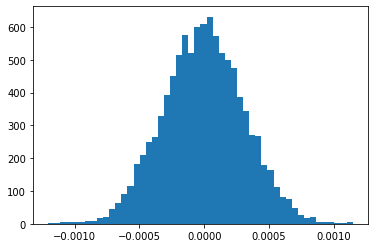

In [5]:
hist([nd.sample() for x in range(10000)], 50);

In [6]:
init_price = 100.0
spread = 0.02
ps = []
ps.append(init_price)

In [7]:
# random walk
num_entries = 1000000
for i in range(num_entries-1):
    ps.append( ps[-1] + round(nd.sample(), 5) )

In [8]:
ps[0:5]

[100.0, 100.00064, 100.00139, 100.00113, 100.00114]

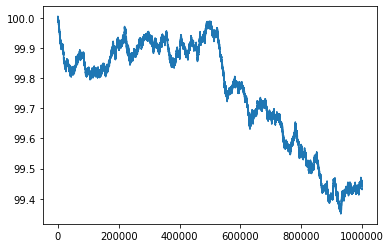

In [9]:
plot(ps);

In [10]:
dti = pd.date_range('2018-01-01', periods=num_entries, freq='Min')
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               ...
               '2019-11-26 10:30:00', '2019-11-26 10:31:00',
               '2019-11-26 10:32:00', '2019-11-26 10:33:00',
               '2019-11-26 10:34:00', '2019-11-26 10:35:00',
               '2019-11-26 10:36:00', '2019-11-26 10:37:00',
               '2019-11-26 10:38:00', '2019-11-26 10:39:00'],
              dtype='datetime64[ns]', length=1000000, freq='T')

In [11]:
df = pd.DataFrame(data=ps, index=dti, columns=['Bid'])
df.head()

,Bid
2018-01-01 00:00:00,100.00000
2018-01-01 00:01:00,100.00064
2018-01-01 00:02:00,100.00139
2018-01-01 00:03:00,100.00113
2018-01-01 00:04:00,100.00114


In [12]:
df = df.resample('15Min').ohlc()
df['volume'] = 100000.0
df.head()

Bid                                     volume
                          open       high        low      close          
2018-01-01 00:00:00  100.00000  100.00139  100.00000  100.00130  100000.0
2018-01-01 00:15:00  100.00147  100.00147   99.99856   99.99856  100000.0
2018-01-01 00:30:00   99.99848  100.00042   99.99799   99.99953  100000.0
2018-01-01 00:45:00   99.99903   99.99904   99.99837   99.99904  100000.0
2018-01-01 01:00:00   99.99922   99.99987   99.99891   99.99987  100000.0

In [13]:
datamatrix = df2dmat(df)

In [14]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2018-01-01 00:00:00,100.00130,100.00139,100.00000,100.00000,100000
2018-01-01 00:15:00,99.99856,100.00147,99.99856,100.00147,100000
2018-01-01 00:30:00,99.99953,100.00042,99.99799,99.99848,100000
2018-01-01 00:45:00,99.99904,99.99904,99.99837,99.99903,100000
2018-01-01 01:00:00,99.99987,99.99987,99.99891,99.99922,100000


In [15]:
len(datamatrix)

66667

In [16]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [17]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2018-01-01 00:00:00,100.00130,100.00139,100.00000,100.00000,100000
2018-01-01 00:15:00,99.99856,100.00147,99.99856,100.00147,100000
2018-01-01 00:30:00,99.99953,100.00042,99.99799,99.99848,100000
2018-01-01 00:45:00,99.99904,99.99904,99.99837,99.99903,100000
2018-01-01 01:00:00,99.99987,99.99987,99.99891,99.99922,100000


In [18]:
len(datamatrix)

66667

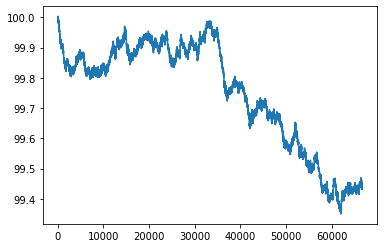

In [19]:
plot(datamatrix.close);

In [20]:
#datamatrix.dump_tsys("data.tsys")

In [21]:
dt = 0.001
x = array(datamatrix.close)

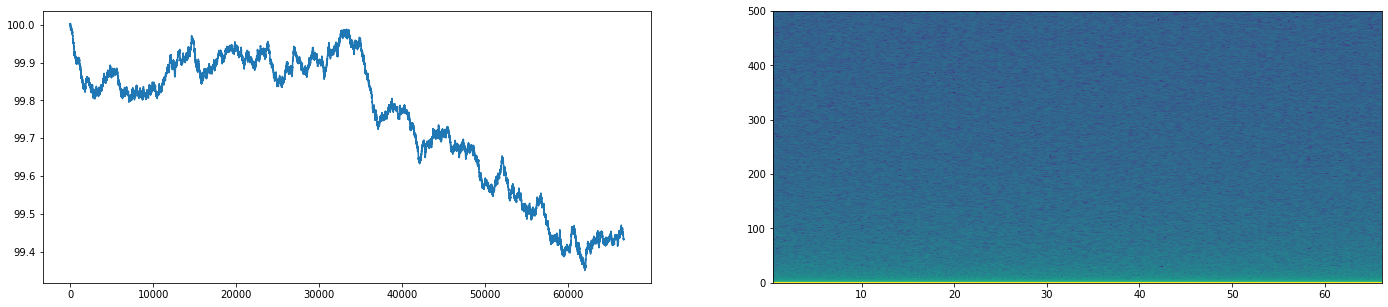

In [22]:
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24,5))
ax1.plot(x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

In [23]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [24]:
import datamodel_minimal as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [25]:
dmodel.process()
nc = dmodel.cut_nans()
nc

1

In [26]:
dmodel.data.shape

(1, 66666)

In [27]:
dmodel.data[0:10, 0:5]

array([[-2.27781659,  0.81602459, -0.40149781,  0.69927587,  0.09885386]])

In [28]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 66666)

In [29]:
tgt[:, 0:5]

array([[100.00147,  99.99848,  99.99903,  99.99922,  99.99977],
       [100.00147, 100.00042,  99.99904,  99.99987, 100.00098],
       [ 99.99856,  99.99799,  99.99837,  99.99891,  99.99964],
       [ 99.99856,  99.99953,  99.99904,  99.99987,  99.99998]])

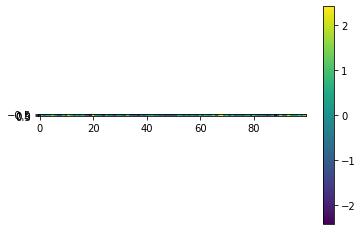

In [30]:
imshow(dmodel.data[:, 0:100]); colorbar();

In [31]:
np.save(open("data_dummy.npy",'wb'), dmodel.data)
np.save(open("data_dummy_targets.npy",'wb'), tgt)

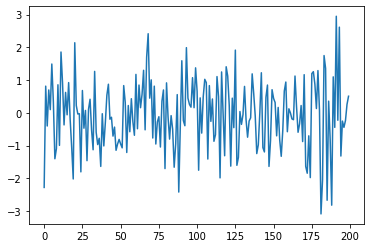

In [32]:
plot(dmodel.data.T[0:200, 0:10]);

In [33]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);